In [1]:
import os

import itertools
import collections

import pandas as pd
import matplotlib.pyplot as plt

import community
import networkx as nx

In [2]:
df_allegations = pd.read_csv('results_victimrace_officer_allegations.csv')

In [3]:
df_allegations.head()

,allegation_id,officer_id,final_outcome,allegation,victim_race
0,27716,22414,No Action Taken,Illegal Arrest / False Arrest,Not found
1,27716,22414,No Action Taken,Illegal Arrest / False Arrest,Not found
2,27716,9389,No Action Taken,Illegal Arrest / False Arrest,Not found
3,27716,9389,No Action Taken,Illegal Arrest / False Arrest,Not found
4,27716,7423,No Action Taken,Illegal Arrest / False Arrest,Not found


In [4]:
df_allegations = df_allegations[df_allegations['victim_race'] == 'Black']

In [5]:
df_allegations.head()

,allegation_id,officer_id,final_outcome,allegation,victim_race
45,27721,12640,No Action Taken,Miscellaneous,Black
46,27721,12640,No Action Taken,Miscellaneous,Black
47,27721,12212,No Action Taken,Miscellaneous,Black
48,27721,12212,No Action Taken,Miscellaneous,Black
49,27721,7712,No Action Taken,Miscellaneous,Black


In [6]:
len(df_allegations)

78592

In [7]:
df_officer_allegations = df_allegations[['officer_id', 'allegation']]

In [8]:
df_officer_allegations = df_officer_allegations.groupby('officer_id')['allegation'].apply(list)

In [9]:
def generate_edges(list_of_alleg):
    return [(list_of_alleg[i], list_of_alleg[i+1])for i in range(0,len(list_of_alleg)-1)]

In [10]:
edges = []

for row in df_officer_allegations:
    count = len(row)
    if count > 1:
        edges.extend(generate_edges(row))

In [11]:
edges

[('Unnecessary Display Of Weapon / Off Duty',
  'Search Of Premise Without Warrant'),
 ('Search Of Premise Without Warrant',
  'Inadequate / Failure To Provide Service'),
 ('Inventory Procedures', 'Improper Search Of Person'),
 ('Improper Search Of Person', 'Improper Search Of Person'),
 ('Improper Search Of Person', 'Illegal Arrest / False Arrest'),
 ('Illegal Arrest / False Arrest', 'Excessive Force / On Duty - Injury'),
 ('Excessive Force / On Duty - Injury', 'Excessive Force / On Duty - Injury'),
 ('Excessive Force / On Duty - Injury', 'Inventory Procedures'),
 ('Inventory Procedures', 'Inventory Procedures'),
 ('Inventory Procedures', 'Excessive Force / On Duty - No Injury'),
 ('Excessive Force / On Duty - No Injury',
  'Excessive Force / On Duty - No Injury'),
 ('Excessive Force / On Duty - No Injury', 'Gang Affiliation'),
 ('Gang Affiliation', 'Gang Affiliation'),
 ('Excessive Force / On Duty - Injury', 'Excessive Force / On Duty - Injury'),
 ('Illegal Arrest / False Arrest', 'I

In [12]:
len(edges), len(set(edges))

(68687, 1881)

In [13]:
edge_counts = collections.Counter(edges)

In [14]:
len(edge_counts)

1881

In [15]:
df_edges = pd.DataFrame.from_dict(edge_counts, columns=['Edge Frequency'], orient='index')

In [16]:
df_edges.head()

,Edge Frequency
"(Unnecessary Display Of Weapon / Off Duty, Search Of Premise Without Warrant)",48
"(Search Of Premise Without Warrant, Inadequate / Failure To Provide Service)",221
"(Inventory Procedures, Improper Search Of Person)",26
"(Improper Search Of Person, Improper Search Of Person)",1260
"(Improper Search Of Person, Illegal Arrest / False Arrest)",221


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efbc9e56b00>]], dtype=object)

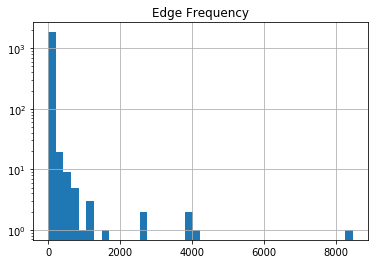

In [17]:
df_edges.hist(bins=40, log=True)

In [18]:
G = nx.Graph()

In [19]:
nodes = dict()

for row in set(edges):
    if row[0] not in nodes:
        nodes[row[0]] = len(nodes)
        G.add_node(nodes[row[0]], name=row[0])
    if row[1] not in nodes:
        nodes[row[1]] = len(nodes)
        G.add_node(nodes[row[1]], name=row[1])
    G.add_edge(nodes[row[0]], nodes[row[1]], weight=float(edge_counts[row]))

In [20]:
len(nodes)

125

In [21]:
len(G.edges)

1292

In [22]:
partition = community.best_partition(G, weight='weight')

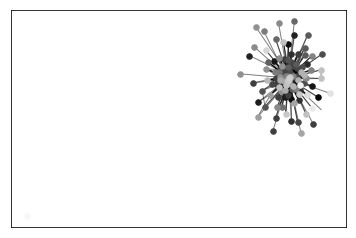

In [23]:
size = float(len(set(partition.values())))
pos = nx.spring_layout(G)
count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 30,
                                node_color = str(count / size))


nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

In [24]:
community.modularity(partition, G)

0.6670551160109004

In [25]:
len(partition.values())

125

In [26]:
communities = { i : [] for i in range(0,40) }

[communities[community].append(G.node[node]['name']) for node, community in enumerate(partition.values())]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [27]:
communities

{0: ['Unnecessary Physical Contact / Off Duty - No Injury',
  'Conduct An Improper / Inadequate Investigation'],
 1: ['Arrest, Improper Procedures', 'First Amendment', 'D.U.I. - On Duty'],
 2: ['Improper Search Of Vehicle',
  'Intoxicated On Duty',
  'Court Attendance Irregularities'],
 3: ['Shots Fired - No Hits',
  'Excessive Detention - After Arrest',
  'Closed Hand Strike (Punch)'],
 4: ['Racial / Ethnic, Etc.',
  'Taser (Probe Discharge)',
  'Stomped / Stepped On'],
 5: ['Fail To Obtain A Complaint Register Number',
  'Traffic Pursuit',
  'Telephone / Attorney / Relative Privileges'],
 6: ['Unnecessary Physical Contact / On Duty - No Injury',
  'Initiate Proper Action',
  'Properly Direct Subordinate',
  'Push/Pull/Grab',
  'Injury / Death (Under Color Of Law)'],
 7: ['Excessive Force / On Duty - Injury'],
 8: ['Slow / No Response',
  'Improper Processing / Reporting / Procedures',
  'Inadequate / Failure To Provide Service',
  'Neglect Of Duty',
  'Seat Belts',
  'Reports',
  'Im

In [28]:
community

<module 'community' from '/home/liankeqin/.local/lib/python3.6/site-packages/community/__init__.py'>